For my project I have selected a dataset of heart failure data. It contains variety of features to including if the patient has died before their next visit. Some of the features include the patients age, if they have a history of other problems and other features. 

Load in the data set and import the necessary modules.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Separate out the part of the data we are training on. In this case it is the death_event feature. This also loads the data into training and testing splits. 

In [2]:
from sklearn.model_selection import train_test_split

X = df.copy().drop('DEATH_EVENT', axis='columns')
y = df['DEATH_EVENT'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

We then select a model to train the data on. In this case I am using a decision tree because it is fairly basic and simple to understand. I also display the f1 score to get a basic idea for how well the model preforms.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"f1 score {f1_score(y_test, y_pred)}")

f1 score 0.631578947368421


I am making a confusion matrix to display how well the model preforms. This can be saved for later and displayed in the app to show the user how well the model is expected to preform. The dataset is fairly small with 300 total entries so the test split I am displaying has very few entries. 

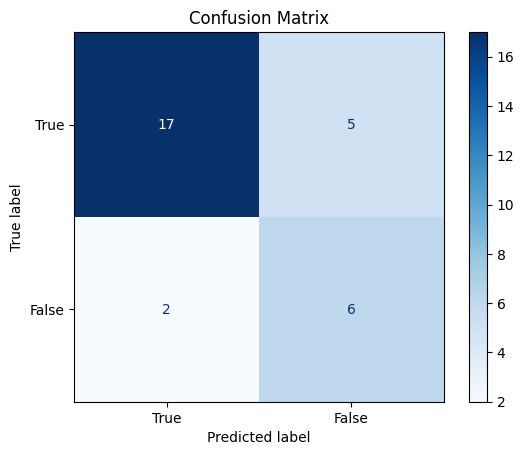

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Save figure to be able to display later
# plt.savefig('static/styles/pretrained_confusion_matrix.png')

I am saving the model using the pickle library and can load it later.

In [5]:
import pickle

with open('saved_model.pkl', 'wb') as file:
    pickle.dump(model, file)

This is loading the model from the file and using it to predict some data from the train test split. This would instead be from user inputed data in the future. 0 in this case is the model predicting the pateient will not have heart failure by the time of the next visit and 1 would be the opposite.

In [7]:
with open('saved_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
    print(loaded_model.predict(X_test))

[0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0]
